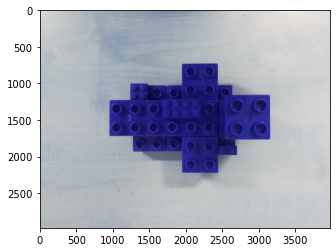

In [1]:
# ez a témalabon pandassal javított változat

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

DATADIR = "E:/Egyetem/5_felev/Temalab/lego_errors/"
CATEGORIES = ['phase_1','phase_2','phase_3']


#egy kép kiírása: (nyilván bonyolultabb, mint kéne, de itt meg van mutatva, hogy hogy is történik az olvasás)
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR) 
        plt.imshow(img_array)
        plt.show()
        break #break nélkül az összeset mutatná
    break

In [2]:
print(img_array)

[[[231 232 222]
  [231 232 222]
  [229 230 220]
  ...
  [219 220 216]
  [222 221 217]
  [222 221 217]]

 [[230 231 221]
  [231 232 222]
  [230 231 221]
  ...
  [219 220 216]
  [221 220 216]
  [222 221 217]]

 [[226 227 218]
  [229 230 221]
  [231 232 223]
  ...
  [221 220 216]
  [221 220 216]
  [222 221 217]]

 ...

 [[178 179 183]
  [177 178 182]
  [175 176 180]
  ...
  [194 199 200]
  [195 200 201]
  [195 200 201]]

 [[184 186 187]
  [185 184 186]
  [183 182 184]
  ...
  [193 201 201]
  [195 200 201]
  [195 200 201]]

 [[179 185 184]
  [179 185 184]
  [181 183 183]
  ...
  [193 201 201]
  [193 201 201]
  [194 202 202]]]


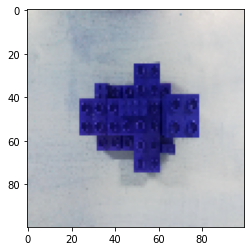

In [3]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [4]:
training_data = []

def create_training_data():
    errorcounter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR) #maradjon színes, ne állítsuk greyscale-re
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exeption as e:
                errorcounter+=1   #megnéztük, hogy volt-e error
    print(errorcounter)
            
create_training_data()

0


In [5]:
print(len(training_data))

1762


In [6]:
#h ne sorszám alapján gondolkodjon
import random

random.shuffle(training_data)

In [7]:
target = [] #---> 0,1,2,3
data = [] #---->array

for features, label in training_data:
    data.append(features.flatten())  #a flatten miatt lesz a data egy dimenziós, amit a printnél láthatunk is
    target.append(label)

print(data[1].shape)

(30000,)


In [8]:
for i in range(10):
    print(target[i])

0
0
0
0
1
2
1
2
2
1


In [17]:
# A randomforest sokkal jobban teljesít..:D

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.2)

In [18]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))

1409
1409
353


In [19]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
model.score(X_test, Y_test) #pontosság

0.9121813031161473

[2]


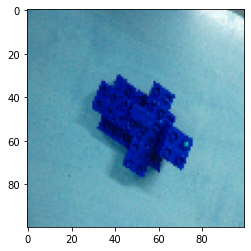

In [13]:
#megnézzük, hogy mit tippel egy bizonyos képre (hogy tényleg jól csinálja-e)
print(model.predict([X_test[2]]))
plt.imshow(X_test[2].reshape(IMG_SIZE,IMG_SIZE,3))
plt.show()

In [14]:
# innentől már csak a confusion mátrixot készítjuk
Y_predicted = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[107,   8,  19],
       [ 16,  83,  14],
       [ 14,  23,  69]], dtype=int64)

Text(69.0, 0.5, 'Truth')

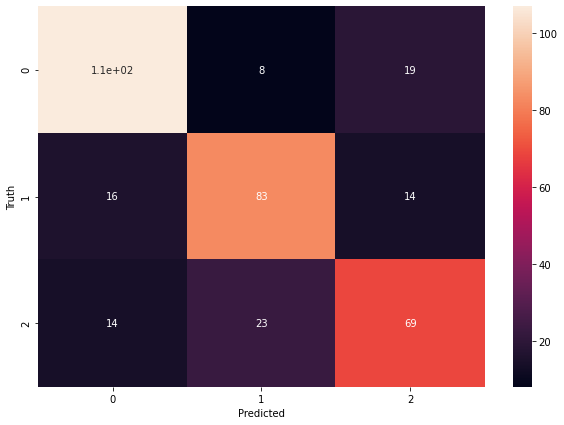

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')